In [1]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#GPU count and name
!nvidia-smi

13G
Mon Feb  8 03:47:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+---

In [2]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GT_IGR/'))
sys.path.append(mp)

In [3]:
import torch
from modules import Reconstruction, Visualization, Utils, Network

In [4]:
# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Define data set name and constraint type
dataset_name = 'stanford-bunny'
constraint_name = 'Eikonal_3atp'
prev_epoch = 9000
epoch = 1000
batch_size = 16384

In [6]:
# Load points from file
filename = mp + '/dataset/3d/' + dataset_name + '.xyz'
data = Utils.read_txt3(filename, k_distance=50, device=device)

In [7]:
traineddata_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch) + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=3, device=device)

Model loaded


Setting up
Loss values loaded
Getting sampling range

Training
Epoch: 9020   Loss: 0.040426261723041534   Learning rate: 7.8125e-06
Surface loss: 5.083275027573109e-05   Normal loss: 0.00652297493070364   Constraint: 0.33852455019950867

Epoch: 9040   Loss: 0.04030729830265045   Learning rate: 7.8125e-06
Surface loss: 0.00011134651867905632   Normal loss: 0.006168380845338106   Constraint: 0.34027570486068726

Epoch: 9060   Loss: 0.040511276572942734   Learning rate: 7.8125e-06
Surface loss: 3.2062573154689744e-05   Normal loss: 0.00590093806385994   Constraint: 0.34578272700309753

Epoch: 9080   Loss: 0.040846679359674454   Learning rate: 7.8125e-06
Surface loss: 4.461568096303381e-05   Normal loss: 0.006101271603256464   Constraint: 0.3470079004764557

Epoch: 9100   Loss: 0.04071619734168053   Learning rate: 7.8125e-06
Surface loss: 3.9604052290087566e-05   Normal loss: 0.0061663854867219925   Constraint: 0.3451020419597626

Epoch: 9120   Loss: 0.03967607766389847   Learning rate: 7.

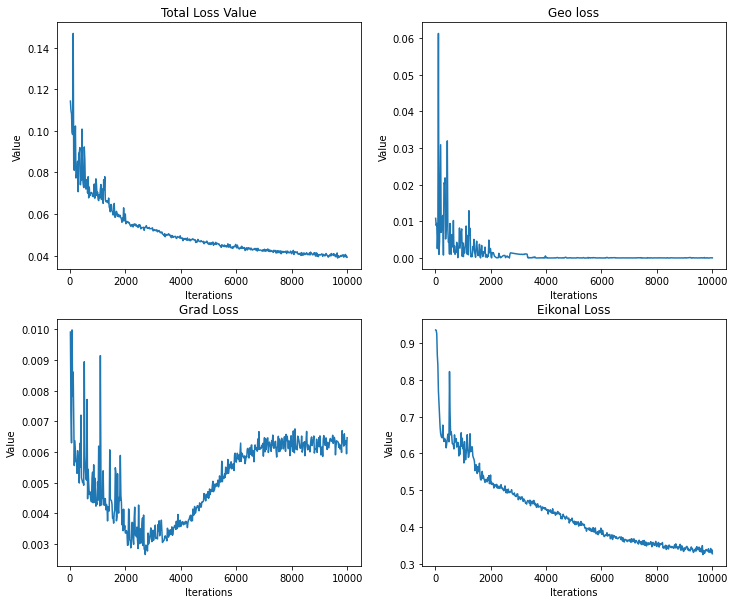

In [8]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' + constraint_name + '.npy'
model, optimizer, scheduler = Reconstruction.train(epoch,
                             model,
                             optimizer,
                             scheduler,
                             data,
                             batch_size=batch_size,
                             loss_output_path=outfile,
                             device=device)

In [9]:
save_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch + epoch) + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [10]:
xx, yy, zz = Visualization.grid_from_torch(data[:,0:3], resx=32, resy=32, resz=32, device=device)

In [11]:
constraint_output = None
vtk_output_path = dataset_name + '_' + constraint_name + '_' + str(prev_epoch + epoch) + '.vtk'
z = Visualization.nn_sampling(model, xx, yy, zz, 
                              constraint_output=constraint_output,
                              vtk_output_path = vtk_output_path,
                              device=device)

VTK file saved


In [12]:
x = data[:,0:3]
f_x = model(x)
print(f_x.abs().mean())
# print((Utils.compute_grad(x, f_x) - data[:,3:6]).norm(2, dim=1).mean())

tensor(5.0266e-05, device='cuda:0', grad_fn=<MeanBackward0>)


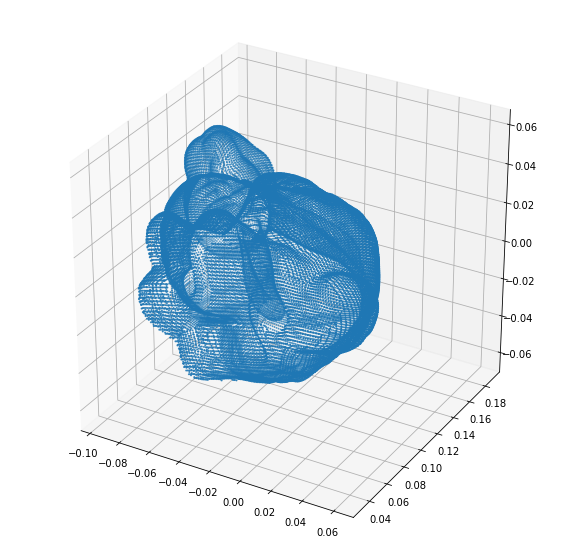

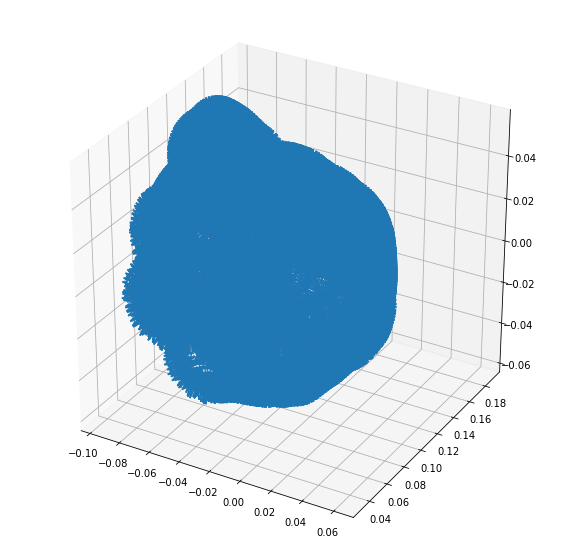

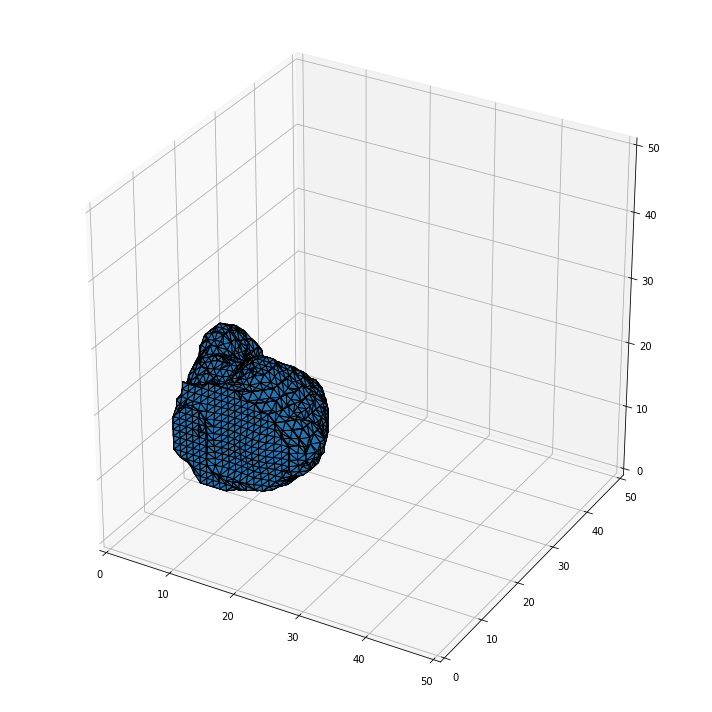

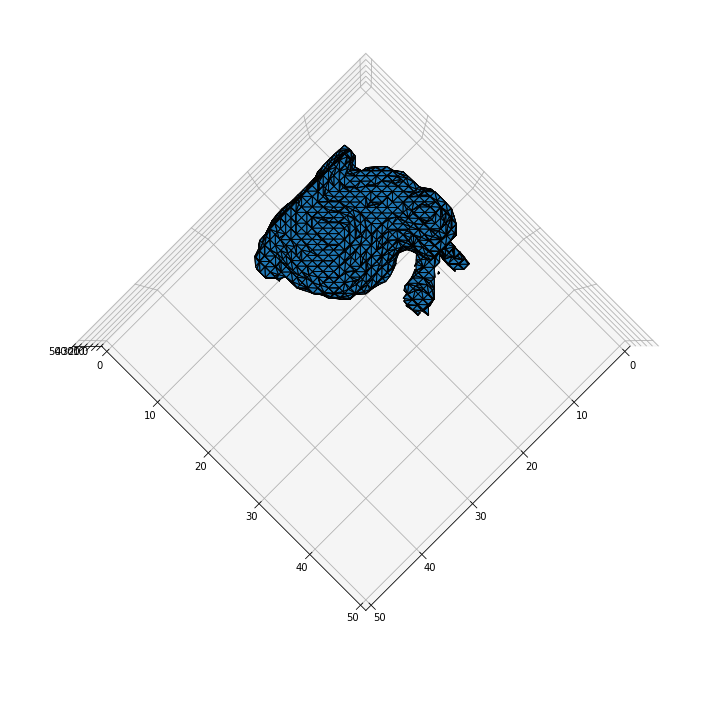

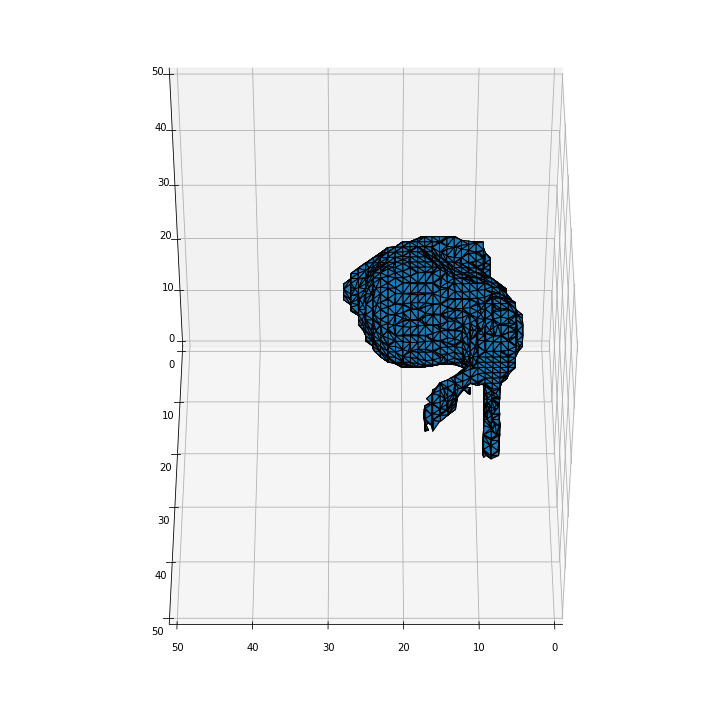

In [13]:
Visualization.visualize3(data[:,0:3].detach().cpu().numpy(), data[:,3:6].detach().cpu().numpy(), z.detach().cpu().numpy())

In [14]:
# import torch

# x = torch.tensor([[0,5], [3,6]])
# y = torch.tensor([[2,3], [4,5], [3,7]])
# print(torch.cat([x,y], dim=1))
# print(model(data[:,0:3]).abs().mean())